In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Vectorial_capacity = xr.open_dataset('Ghana_vc_chirps_era5_Tm_1991-2023.nc')
eip = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
age = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')


In [3]:
Vectorial_capacity = xr.open_dataset('Ghana_vc_chirps_era5_Tm_1991-2023.nc')
vc = Vectorial_capacity['vc']
vc

<xarray.DataArray 'vc' (time: 396, latitude: 30, longitude: 20)>
[237600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1991-01-16 ... 2023-12-16
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    cell_methods:  time: sum

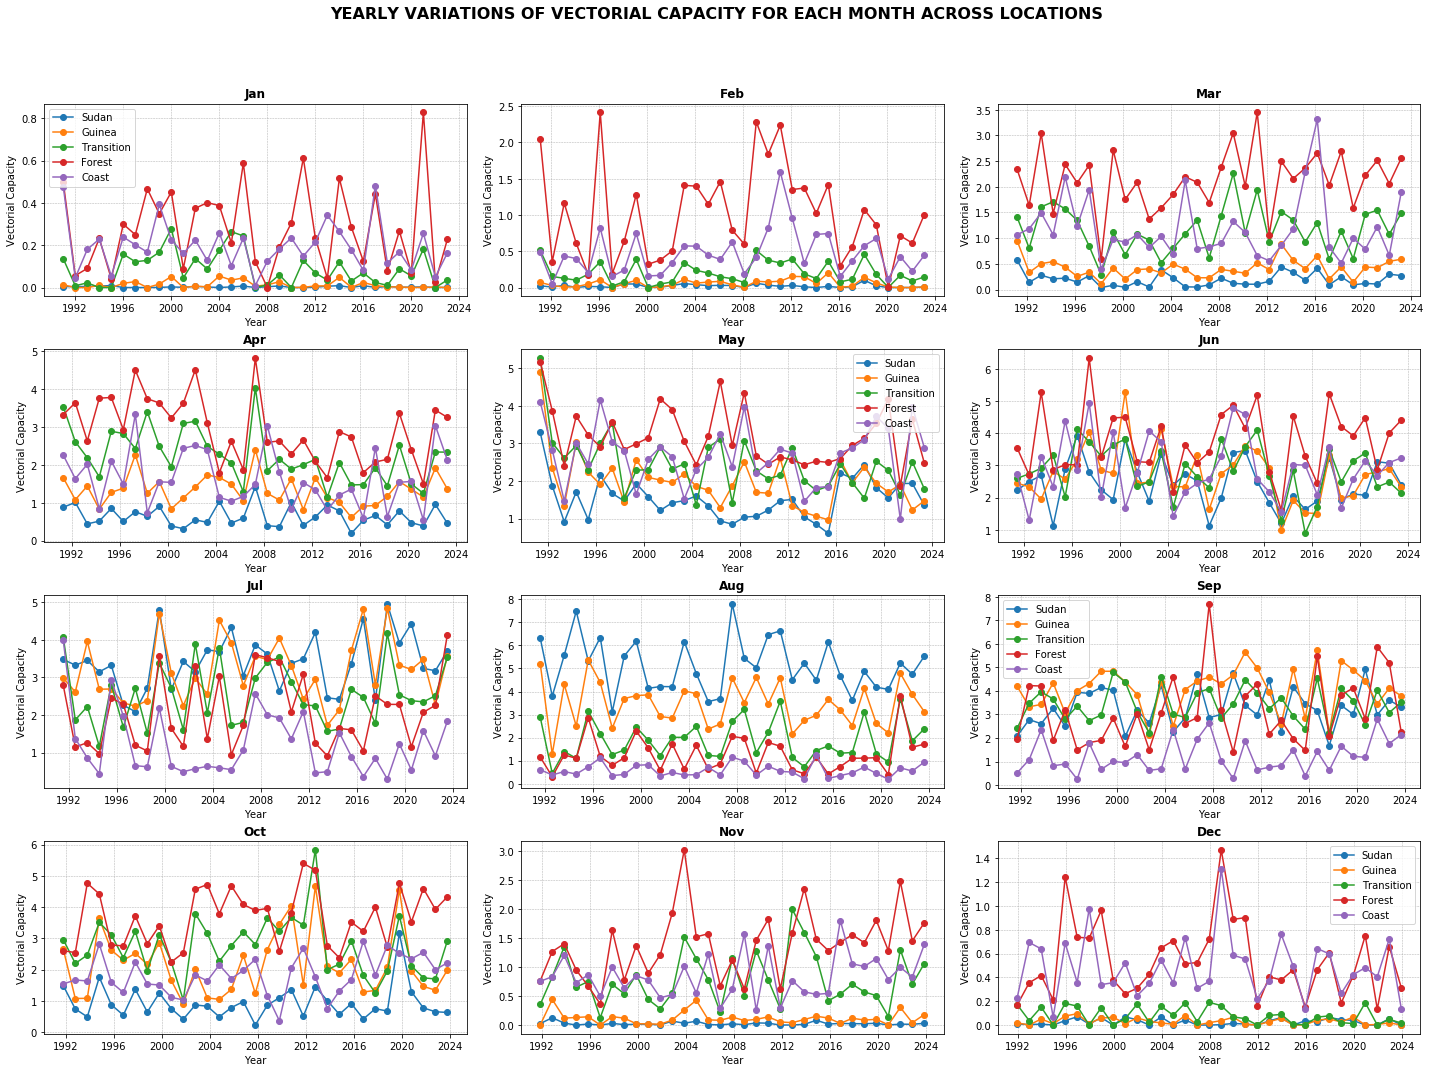

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
Vectorial_capacity = xr.open_dataset('Ghana_vc_chirps_era5_Tm_1991-2023.nc')
vc = Vectorial_capacity['vc']  # Extract the 'vc' variable

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location using the nearest grid point
location_data = {
    loc: vc.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Get month names for subplot titles
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month (1 to 12)
for month in range(1, 13):
    ax = axes[month - 1]  # Select the subplot for the current month

    for loc, data in location_data.items():
        # Select data for the given month across all years
        monthly_data = data.where(data['time'].dt.month == month, drop=True)

        # Plot vectorial capacity against time
        ax.plot(monthly_data['time'], monthly_data, label=loc, marker='o', linestyle='-')

    # Customize subplot
    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Vectorial Capacity", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
axes[0].legend(loc='upper left')
axes[4].legend(loc='upper right')
axes[8].legend(loc='upper left')
axes[11].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.suptitle("YEARLY VARIATIONS OF VECTORIAL CAPACITY FOR EACH MONTH ACROSS LOCATIONS", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.9)

# Save and show the plot
#plt.savefig('vectorial_capacity_variation.png', bbox_inches='tight', dpi=800)
plt.show()


In [6]:
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']
eip

<xarray.DataArray 'eip' (valid_time: 396, latitude: 30, longitude: 20)>
[237600 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 1991-01-16T11:30:00 ... 2023-12-1...
  * longitude   (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude    (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    cell_methods:  valid_time: mean

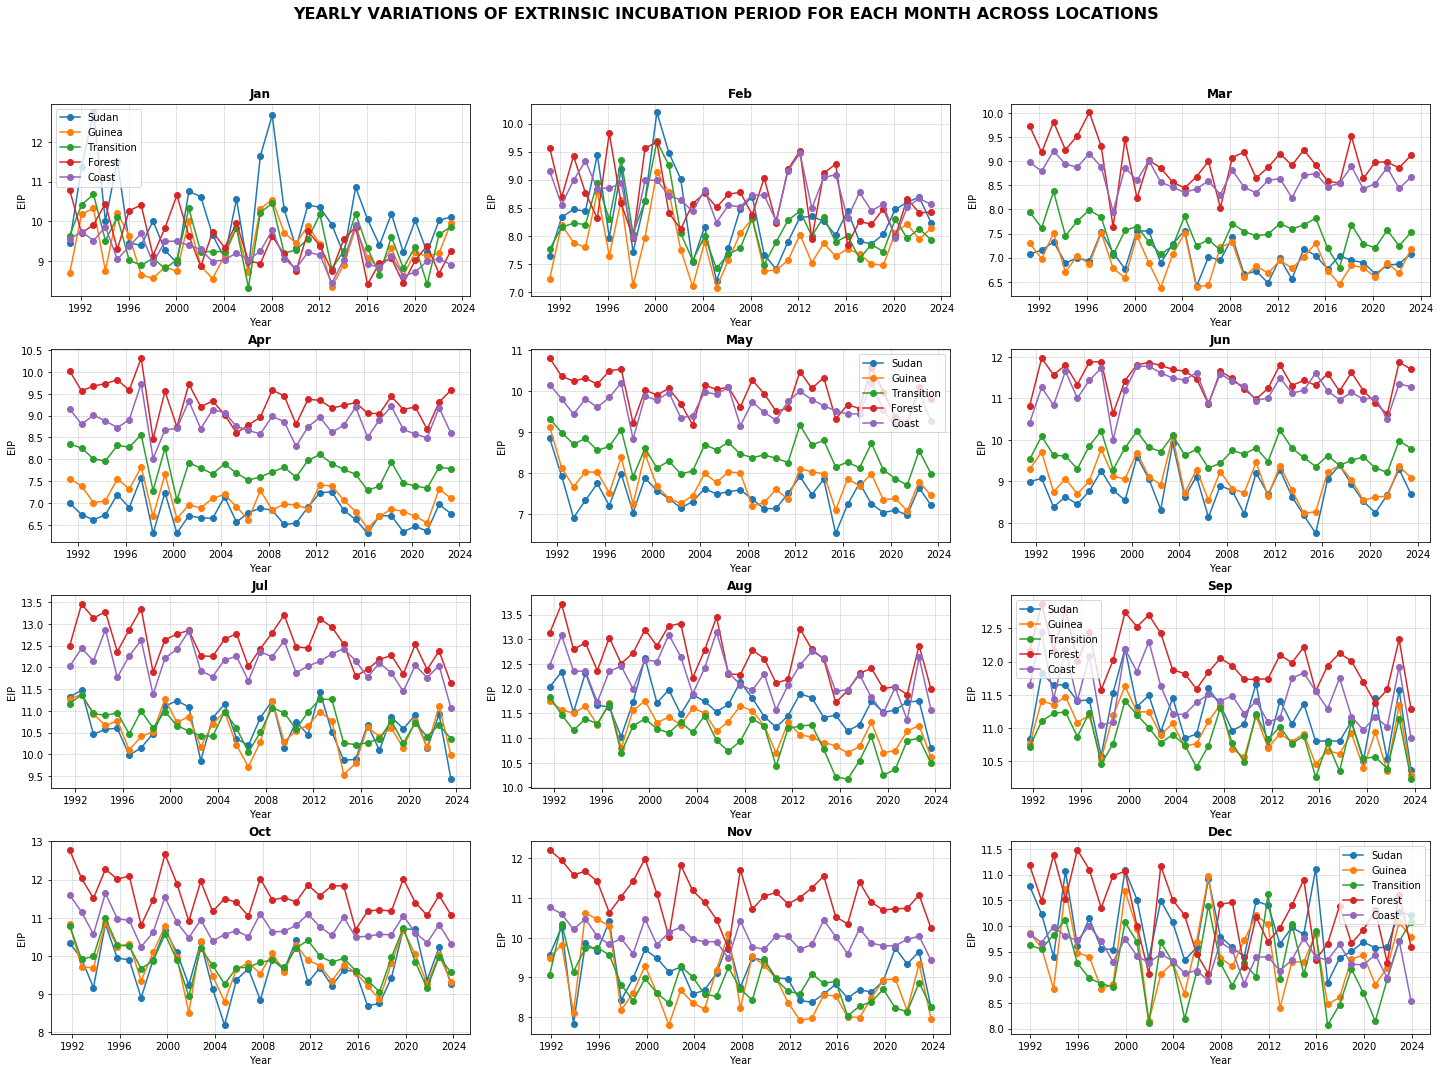

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']
# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location using the nearest grid point
location_data = {
    loc: eip.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Get month names for subplot titles
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month (1 to 12)
for month in range(1, 13):
    ax = axes[month - 1]  # Select the subplot for the current month

    for loc, data in location_data.items():
        # Select data for the given month across all years
        monthly_data = data.where(data['valid_time'].dt.month == month, drop=True)

        # Plot vectorial capacity against time
        ax.plot(monthly_data['valid_time'], monthly_data, label=loc, marker='o', linestyle='-')

    # Customize subplot
    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("EIP", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
axes[0].legend(loc='upper left')
axes[4].legend(loc='upper right')
axes[8].legend(loc='upper left')
axes[11].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.suptitle("YEARLY VARIATIONS OF EXTRINSIC INCUBATION PERIOD FOR EACH MONTH ACROSS LOCATIONS", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.9)

# Save and show the plot
#plt.savefig('vectorial_capacity_variation.png', bbox_inches='tight', dpi=800)
plt.show()


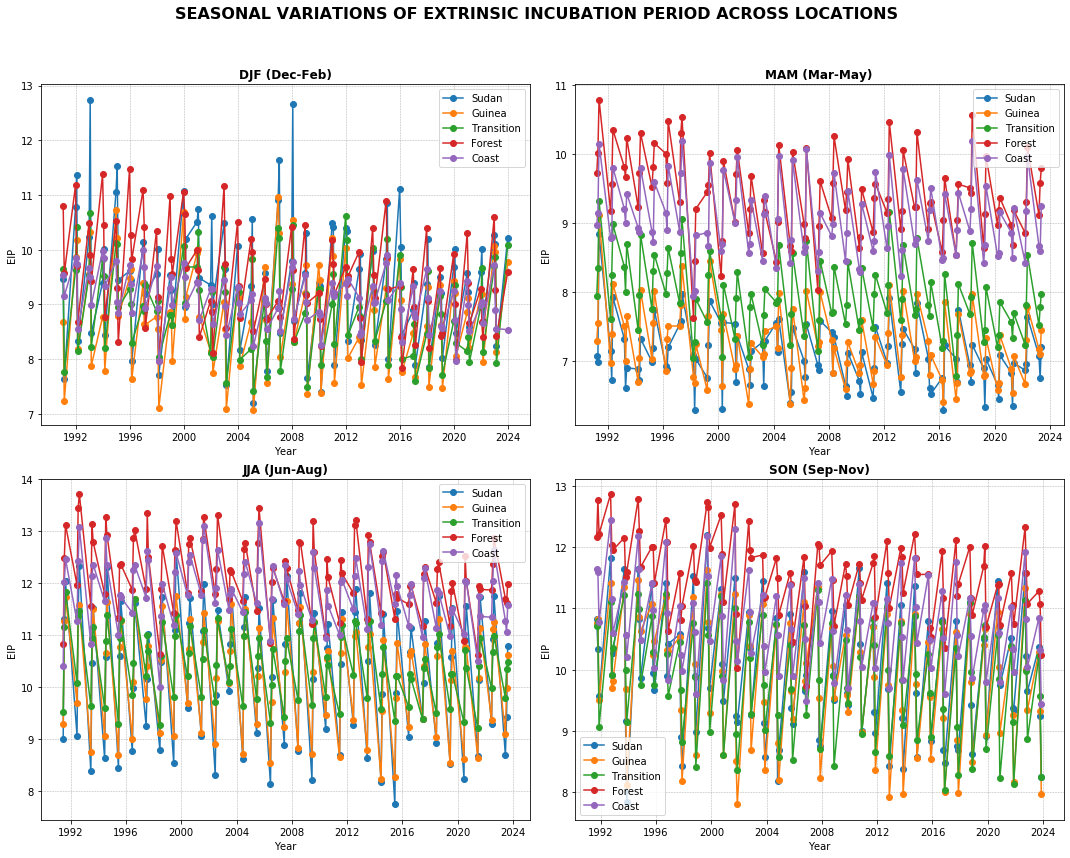

In [25]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Define seasons
seasons = {
    "DJF (Dec-Feb)": [12, 1, 2],
    "MAM (Mar-May)": [3, 4, 5],
    "JJA (Jun-Aug)": [6, 7, 8],
    "SON (Sep-Nov)": [9, 10, 11]
}

# Extract data for each location
location_data = {
    loc: eip.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop through each season
for i, (season, months) in enumerate(seasons.items()):
    ax = axes[i]  # Select the subplot for the current season
    
    for loc, data in location_data.items():
        # Select data for the given season across all years
        seasonal_data = data.where(data['valid_time'].dt.month.isin(months), drop=True)
        
        # Plot seasonal variation
        ax.plot(seasonal_data['valid_time'], seasonal_data, label=loc, marker='o', linestyle='-')
    
    # Customize subplot
    ax.set_title(season, fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("EIP", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.suptitle("SEASONAL VARIATIONS OF EXTRINSIC INCUBATION PERIOD ACROSS LOCATIONS", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.9)

# Save and show the plot
# plt.savefig('seasonal_eip_variation.png', bbox_inches='tight', dpi=800)
plt.show()

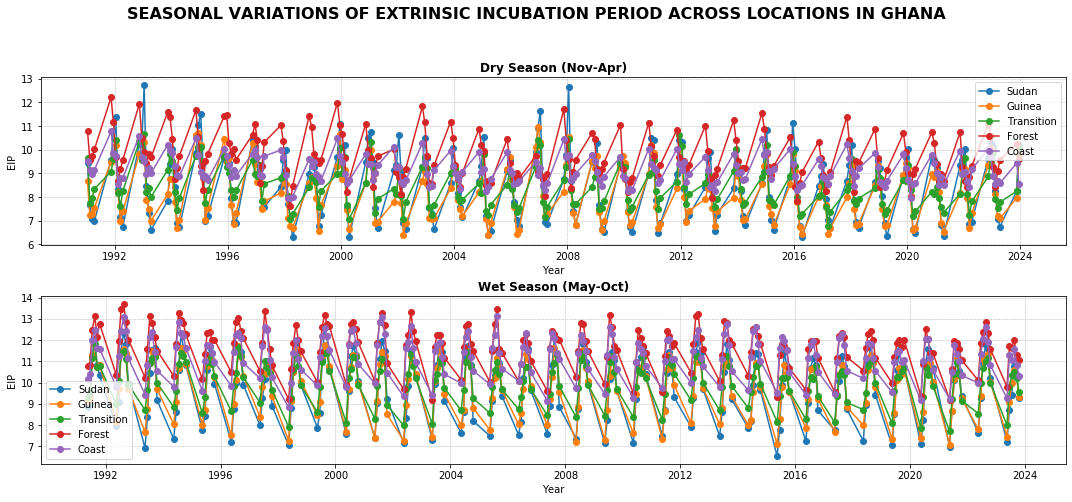

In [34]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Define Ghana's seasons
seasons = {
    "Dry Season (Nov-Apr)": [11, 12, 1, 2, 3, 4],
    "Wet Season (May-Oct)": [5, 6, 7, 8, 9, 10]
}

# Extract data for each location
location_data = {
    loc: eip.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid
fig, axes = plt.subplots(2, 1, figsize=(15,7))
axes = axes.flatten()

# Loop through each season
for i, (season, months) in enumerate(seasons.items()):
    ax = axes[i]  # Select the subplot for the current season
    
    for loc, data in location_data.items():
        # Select data for the given season across all years
        seasonal_data = data.where(data['valid_time'].dt.month.isin(months), drop=True)
        
        # Plot seasonal variation
        ax.plot(seasonal_data['valid_time'], seasonal_data, label=loc, marker='o', linestyle='-')
    
    # Customize subplot
    ax.set_title(season, fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("EIP", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.suptitle("SEASONAL VARIATIONS OF EXTRINSIC INCUBATION PERIOD ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.85)

# Save and show the plot
# plt.savefig('ghana_seasonal_eip_variation.png', bbox_inches='tight', dpi=800)
plt.show()


ValueError: Could not convert object to NumPy datetime

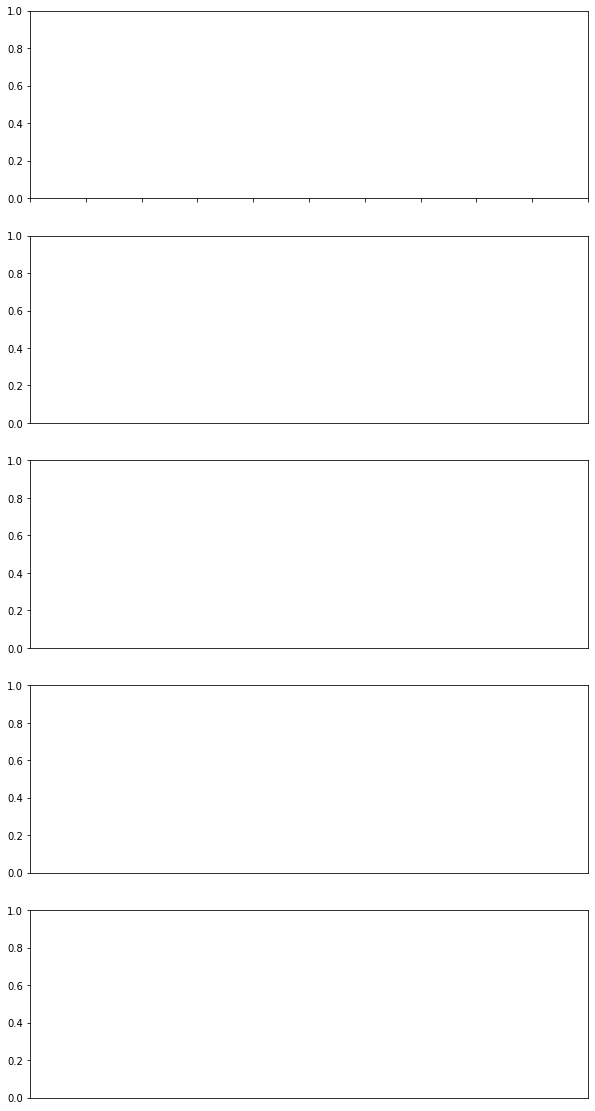

In [35]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {
    loc: eip.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    ax = axes[i]  # Select the subplot for the current location
    
    # Compute annual means
    annual_data = data.resample(valid_time='Y').mean()
    
    # Plot annual variation
    ax.scatter(annual_data['valid_time'], annual_data, label=loc)
    
    # Customize subplot
    ax.set_title(f"Annual Variation of EIP - {loc}", fontsize=12, fontweight='bold')
    ax.set_ylabel("EIP", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()

# Set common x-label
axes[-1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF EXTRINSIC INCUBATION PERIOD ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_eip_variation.png', bbox_inches='tight', dpi=800)
plt.show()


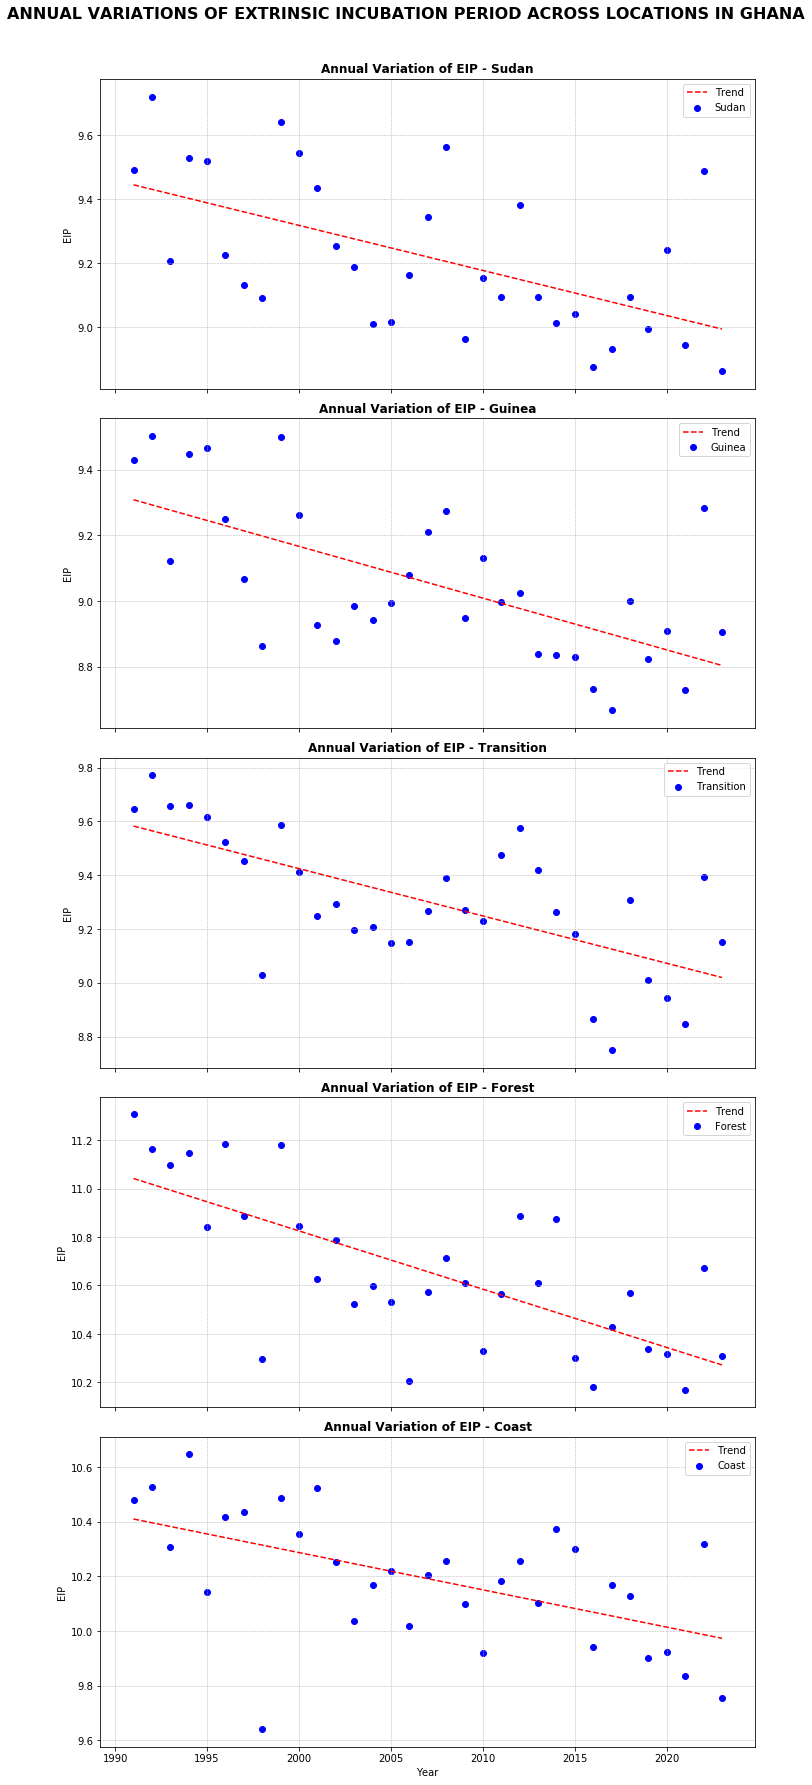

In [36]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {
    loc: eip.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 1, figsize=(10, 25), sharex=True)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    ax = axes[i]  # Select the subplot for the current location
    
    # Compute annual means
    annual_data = data.resample(valid_time='Y').mean()
    years = annual_data['valid_time'].dt.year.values
    values = annual_data.values
    
    # Scatter plot of annual variation
    ax.scatter(years, values, label=loc, color='blue')
    
    # Fit a trend line
    if len(years) > 1:
        coeffs = np.polyfit(years, values, 1)  # Linear trend
        trend = np.poly1d(coeffs)
        ax.plot(years, trend(years), color='red', linestyle='--', label='Trend')
    
    # Customize subplot
    ax.set_title(f"Annual Variation of EIP - {loc}", fontsize=12, fontweight='bold')
    ax.set_ylabel("EIP", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()

# Set common x-label
axes[-1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF EXTRINSIC INCUBATION PERIOD ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_eip_variation.png', bbox_inches='tight', dpi=800)
plt.show()


In [55]:
TEMP= xr.open_dataset('Ghana_ERA5_dTm_1991_2023.nc')
temp= TEMP['mm2t']
temp

<xarray.DataArray 'mm2t' (valid_time: 12053, latitude: 31, longitude: 21)>
[7846503 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 1991-01-01T11:30:00 ... 2023-12-3...
  * longitude   (longitude) float64 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude    (latitude) float64 12.0 11.75 11.5 11.25 ... 5.25 5.0 4.75 4.5

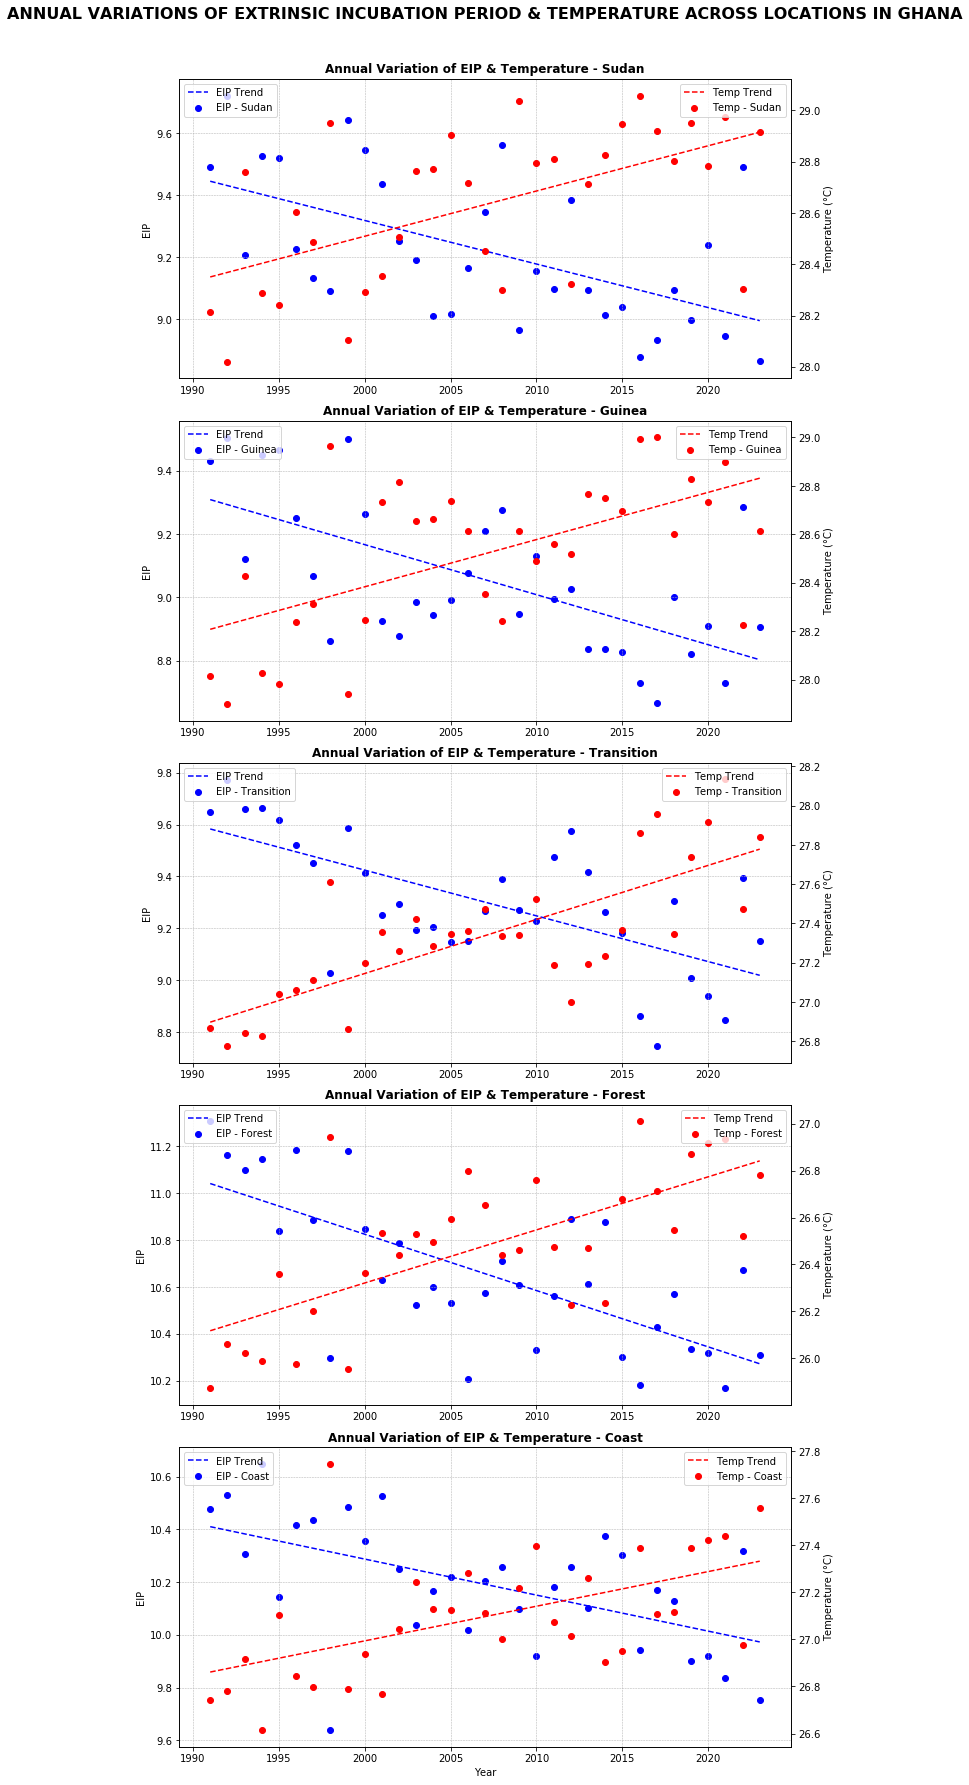

In [47]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']
Temperature = xr.open_dataset('Ghana_ERA5_dTm_1991_2023.nc')
temp = Temperature['mm2t']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {
    loc: eip.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}
location_temp_data = {
    loc: temp.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 1, figsize=(10, 25), sharex=False)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    ax = axes[i]  # Select the subplot for the current location
    ax2 = ax.twinx()  # Create a secondary y-axis
    
    # Compute annual means for EIP and Temperature
    annual_data = data.resample(valid_time='Y').mean()
    annual_temp_data = location_temp_data[loc].resample(valid_time='Y').mean()
    
    years = annual_data['valid_time'].dt.year.values
    eip_values = annual_data.values
    temp_values = annual_temp_data.values
    
    # Scatter plot for EIP
    ax.scatter(years, eip_values, label=f"EIP - {loc}", color='blue')
    
    # Fit a trend line for EIP
    if len(years) > 1:
        eip_coeffs = np.polyfit(years, eip_values, 1)  # Linear trend
        eip_trend = np.poly1d(eip_coeffs)
        ax.plot(years, eip_trend(years), color='blue', linestyle='--', label='EIP Trend')
    
    # Scatter plot for Temperature
    ax2.scatter(years, temp_values, label=f"Temp - {loc}", color='red')
    
    # Fit a trend line for Temperature
    if len(years) > 1:
        temp_coeffs = np.polyfit(years, temp_values, 1)  # Linear trend
        temp_trend = np.poly1d(temp_coeffs)
        ax2.plot(years, temp_trend(years), color='red', linestyle='--', label='Temp Trend')
    
    # Customize subplot
    ax.set_title(f"Annual Variation of EIP & Temperature - {loc}", fontsize=12, fontweight='bold')
    ax.set_ylabel("EIP", fontsize=10, color='black')
    ax2.set_ylabel("Temperature (°C)", fontsize=10, color='black')
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Set common x-label
axes[-1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF EXTRINSIC INCUBATION PERIOD & TEMPERATURE ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_eip_temp_variation.png', bbox_inches='tight', dpi=800)
plt.show()


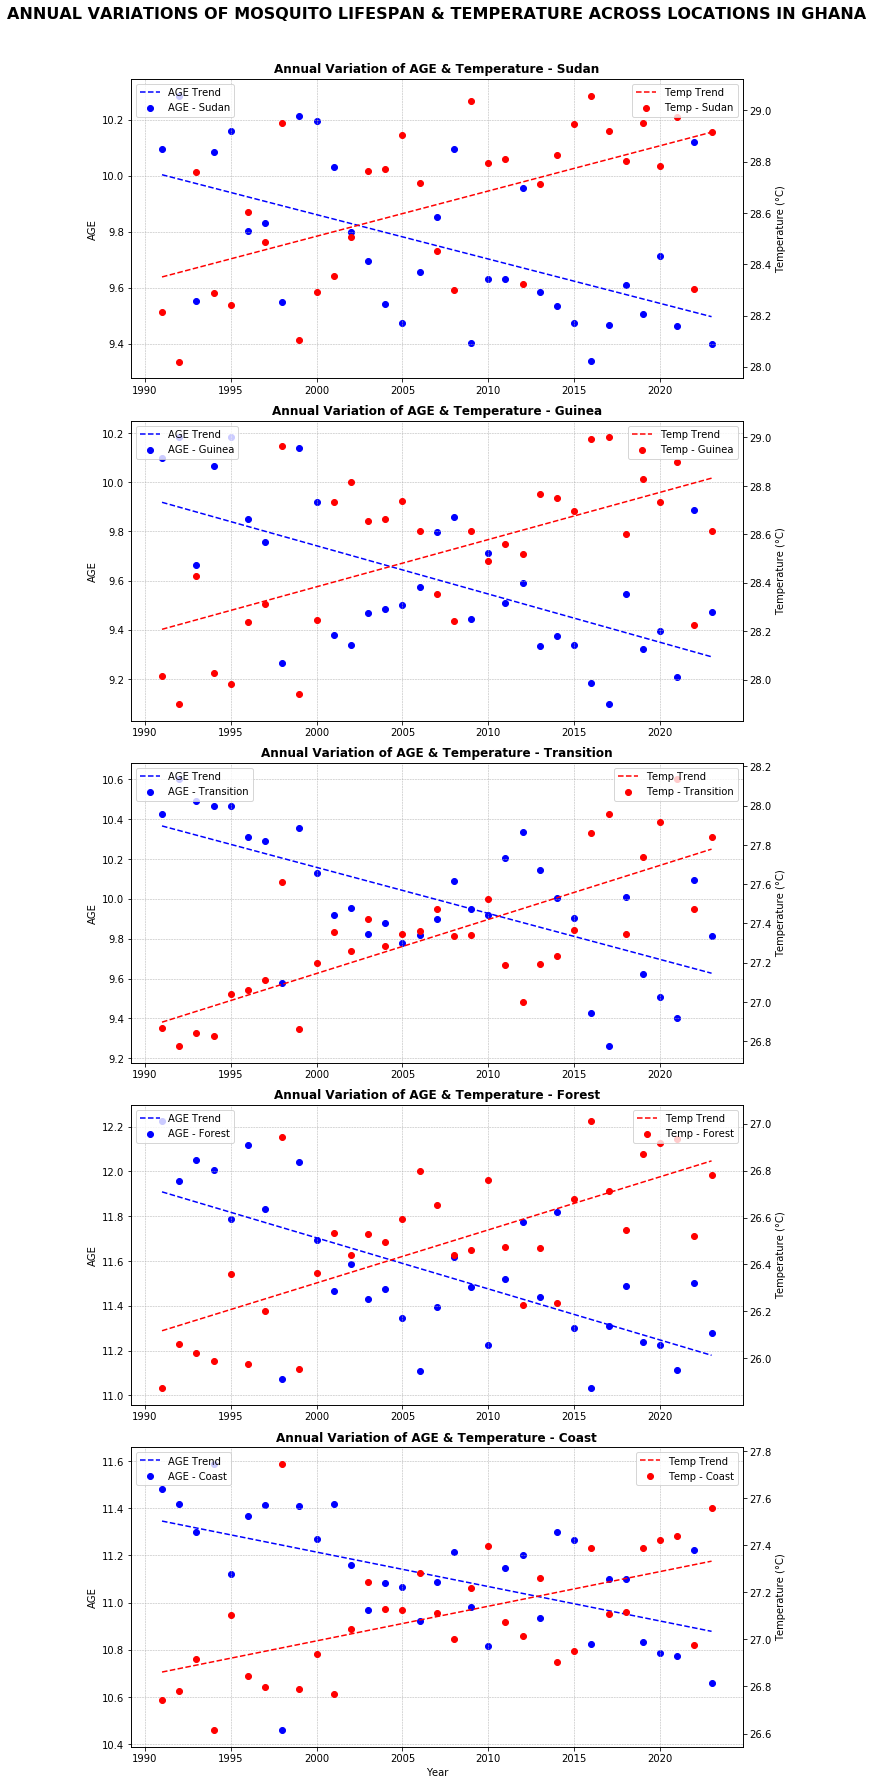

In [49]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
AGE = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')
age = AGE['age']
Temperature = xr.open_dataset('Ghana_ERA5_dTm_1991_2023.nc')
temp = Temperature['mm2t']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {
    loc: age.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}
location_temp_data = {
    loc: temp.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 1, figsize=(10, 25), sharex=False)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    ax = axes[i]  # Select the subplot for the current location
    ax2 = ax.twinx()  # Create a secondary y-axis
    
    # Compute annual means for EIP and Temperature
    annual_data = data.resample(valid_time='Y').mean()
    annual_temp_data = location_temp_data[loc].resample(valid_time='Y').mean()
    
    years = annual_data['valid_time'].dt.year.values
    age_values = annual_data.values
    temp_values = annual_temp_data.values
    
    # Scatter plot for EIP
    ax.scatter(years, age_values, label=f"AGE - {loc}", color='blue')
    
    # Fit a trend line for EIP
    if len(years) > 1:
        age_coeffs = np.polyfit(years, age_values, 1)  # Linear trend
        age_trend = np.poly1d(age_coeffs)
        ax.plot(years, age_trend(years), color='blue', linestyle='--', label='AGE Trend')
    
    # Scatter plot for Temperature
    ax2.scatter(years, temp_values, label=f"Temp - {loc}", color='red')
    
    # Fit a trend line for Temperature
    if len(years) > 1:
        temp_coeffs = np.polyfit(years, temp_values, 1)  # Linear trend
        temp_trend = np.poly1d(temp_coeffs)
        ax2.plot(years, temp_trend(years), color='red', linestyle='--', label='Temp Trend')
    
    # Customize subplot
    ax.set_title(f"Annual Variation of AGE & Temperature - {loc}", fontsize=12, fontweight='bold')
    ax.set_ylabel("AGE", fontsize=10, color='black')
    ax2.set_ylabel("Temperature (°C)", fontsize=10, color='black')
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Set common x-label
axes[-1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF MOSQUITO LIFESPAN & TEMPERATURE ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_eip_temp_variation.png', bbox_inches='tight', dpi=800)
plt.show()


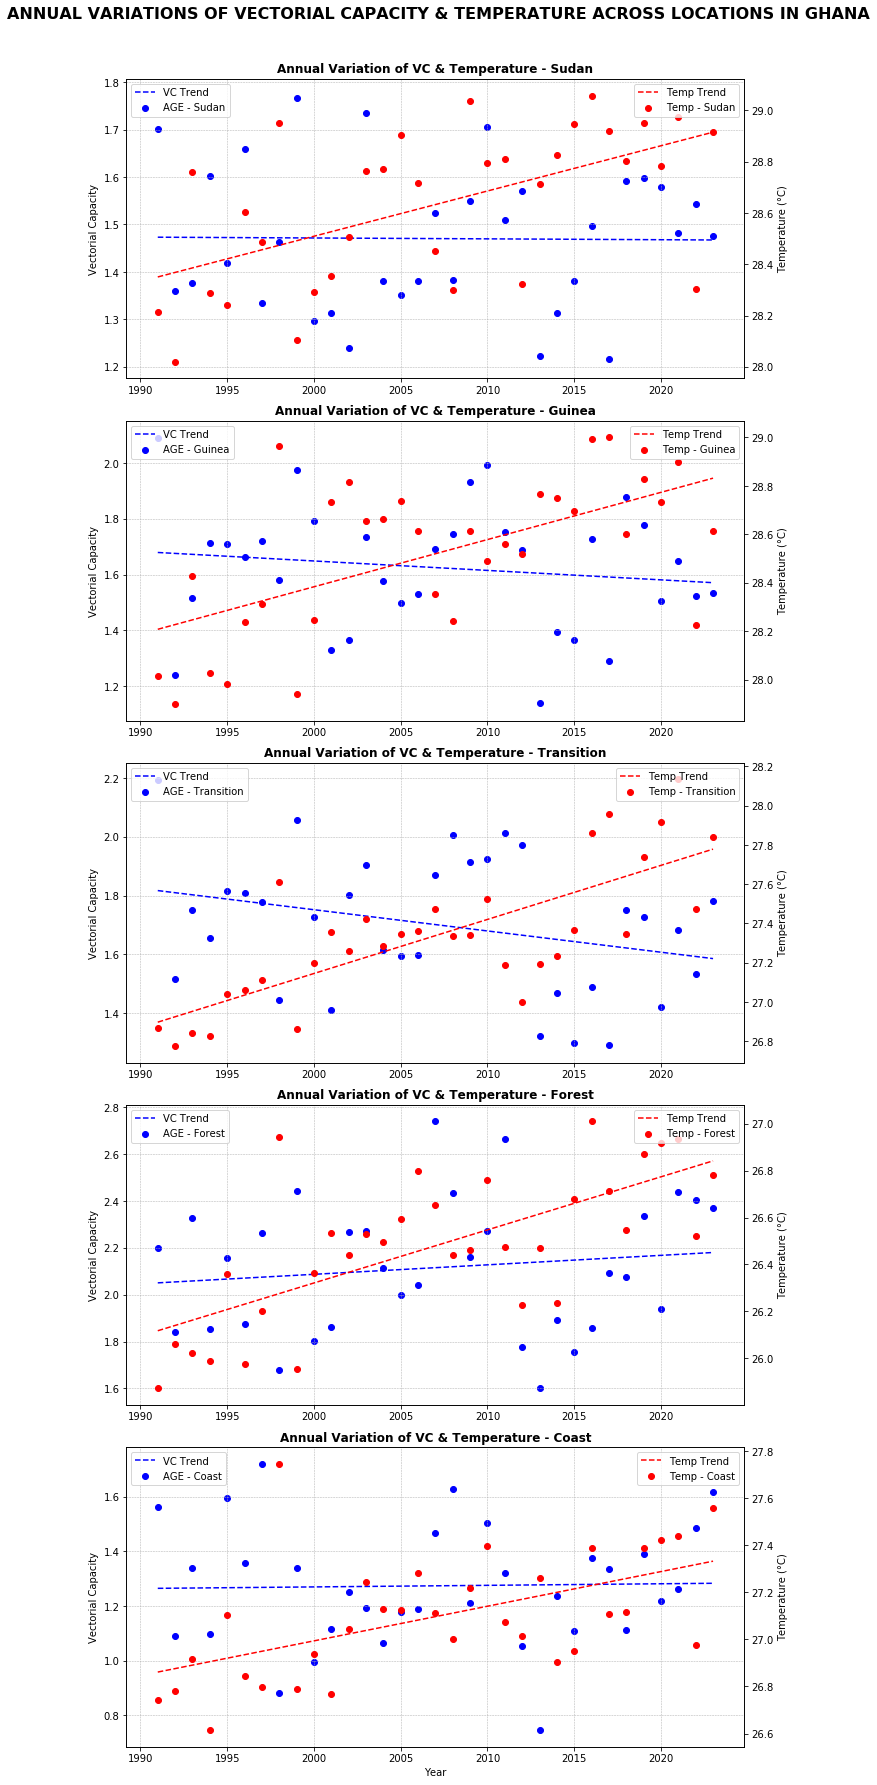

In [67]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
Vectorial_capacity = xr.open_dataset('Ghana_vc_chirps_era5_Tm_1991-2023.nc')
vc = Vectorial_capacity['vc']  # Extract the 'vc' variable
Temperature = xr.open_dataset('Ghana_ERA5_dTm_1991_2023.nc')
temp = Temperature['mm2t']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {
    loc: vc.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}
location_temp_data = {
    loc: temp.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 1, figsize=(10, 25), sharex=False)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    ax = axes[i]  # Select the subplot for the current location
    ax2 = ax.twinx()  # Create a secondary y-axis
    
#     # Compute annual means for EIP and Temperature
    annual_data = data.resample(time='Y').mean()
    annual_temp_data = location_temp_data[loc].resample(valid_time='Y').mean()
    
    years_vc = annual_data['time'].dt.year.values
    years = annual_temp_data['valid_time'].dt.year.values
    vc_values = annual_data.values
    temp_values = annual_temp_data.values
    
    # Scatter plot for EIP
    ax.scatter(years_vc, vc_values, label=f"AGE - {loc}", color='blue')
    
    # Fit a trend line for EIP
    if len(years) > 1:
        vc_coeffs = np.polyfit(years_vc, vc_values, 1)  # Linear trend
        vc_trend = np.poly1d(vc_coeffs)
        ax.plot(years, vc_trend(years_vc), color='blue', linestyle='--', label='VC Trend')
    
    # Scatter plot for Temperature
    ax2.scatter(years, temp_values, label=f"Temp - {loc}", color='red')
    
    # Fit a trend line for Temperature
    if len(years) > 1:
        temp_coeffs = np.polyfit(years, temp_values, 1)  # Linear trend
        temp_trend = np.poly1d(temp_coeffs)
        ax2.plot(years, temp_trend(years), color='red', linestyle='--', label='Temp Trend')
    
    # Customize subplot
    ax.set_title(f"Annual Variation of VC & Temperature - {loc}", fontsize=12, fontweight='bold')
    ax.set_ylabel("Vectorial Capacity", fontsize=10, color='black')
    ax2.set_ylabel("Temperature (°C)", fontsize=10, color='black')
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Set common x-label
axes[-1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF VECTORIAL CAPACITY & TEMPERATURE ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_eip_temp_variation.png', bbox_inches='tight', dpi=800)
plt.show()


In [72]:
RH = xr.open_dataset('Ghana_RH_dd_1991-2023.nc')
RR = xr.open_dataset('Ghana_chirps_dRR_1991_2023.nc')

C:\Users\Upgray\AppData\Roaming\Python\Python36\site-packages\xarray\coding\times.py:463: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [76]:
RH

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 31, longitude: 21, time: 12053)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01T11:00:00 ... 2023-12-31T06:00:00
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 12.0 11.75 11.5 11.25 ... 5.25 5.0 4.75 4.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1991-01-01 00:00:00 ... -002-11-30 00:00:00
    r          (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 28 11:45:56 2025: cdo mergetime Ghana_RH_dd_1991-20...
    frequency:    day
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

C:\Users\Upgray\AppData\Roaming\Python\Python36\site-packages\xarray\coding\times.py:463: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


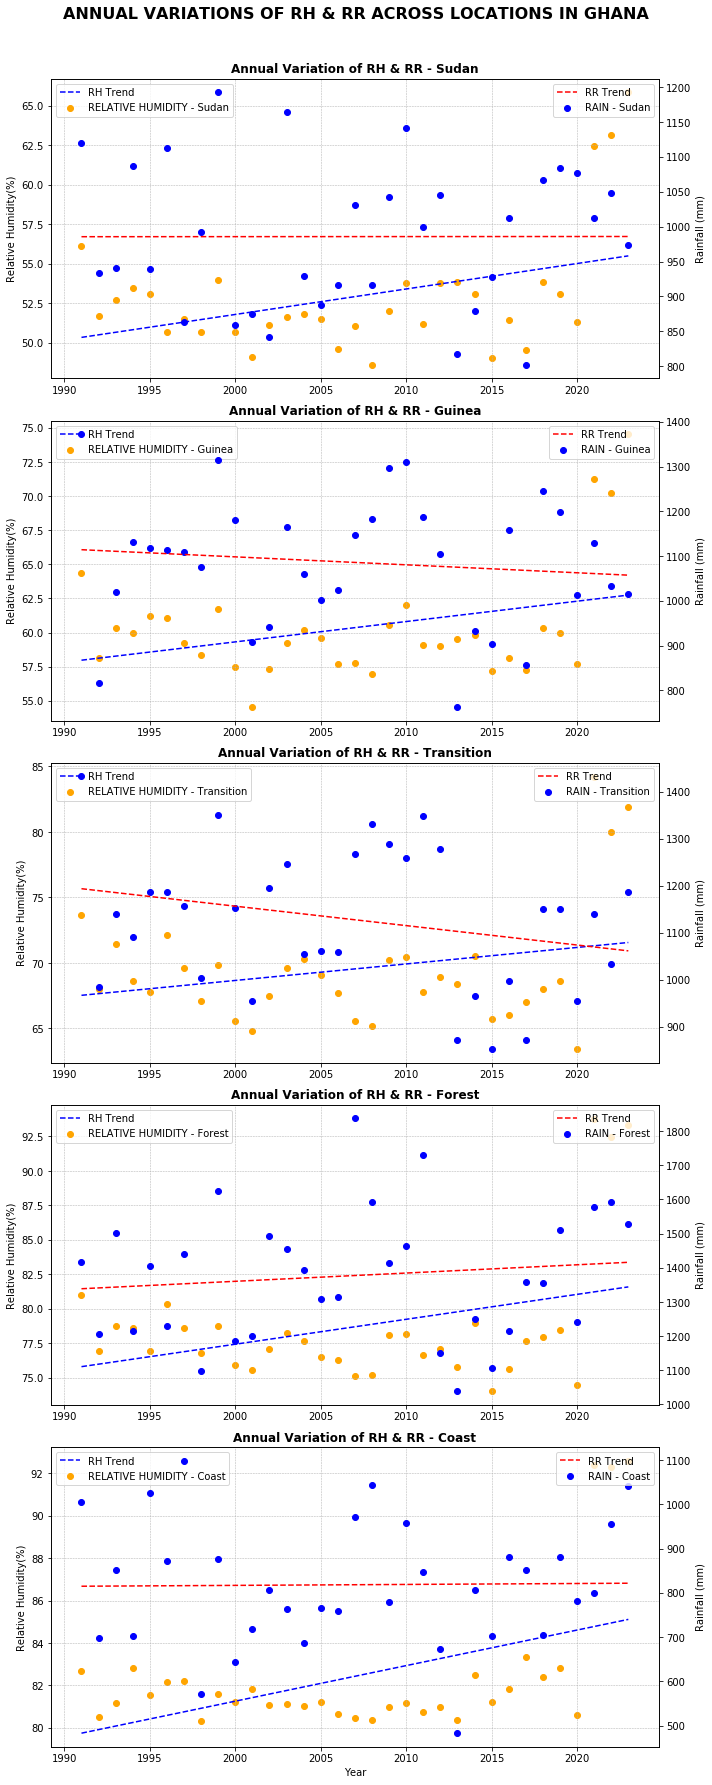

In [79]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets


RH = xr.open_dataset('Ghana_RH_dd_1991-2023.nc')
rh = RH['r']  # Extract the 'vc' variable
RR = xr.open_dataset('Ghana_chirps_dRR_1991_2023.nc')
rr = RR['precip']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {
    loc: rh.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}
location_rain_data = {
    loc: rr.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 1, figsize=(10, 25), sharex=False)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    ax = axes[i]  # Select the subplot for the current location
    ax2 = ax.twinx()  # Create a secondary y-axis
    
#     # Compute annual means for EIP and Temperature
    annual_data = data.resample(time='Y').mean()
    annual_rr_data = location_rain_data[loc].resample(time='Y').sum()
    
    years = annual_data['time'].dt.year.values
    #years = annual_temp_data['time'].dt.year.values
    rh_values = annual_data.values
    rain_values = annual_rr_data.values
    
    # Scatter plot for EIP
    ax.scatter(years, rh_values, label=f"RELATIVE HUMIDITY - {loc}", color='orange')
    
    # Fit a trend line for EIP
    if len(years) > 1:
        rh_coeffs = np.polyfit(years, rh_values, 1)  # Linear trend
        rh_trend = np.poly1d(rh_coeffs)
        ax.plot(years, rh_trend(years), color='blue', linestyle='--', label='RH Trend')
    
    # Scatter plot for Temperature
    ax2.scatter(years, rain_values, label=f"RAIN - {loc}", color='blue')
    
    # Fit a trend line for Temperature
    if len(years) > 1:
        rr_coeffs = np.polyfit(years, rain_values, 1)  # Linear trend
        rr_trend = np.poly1d(rr_coeffs)
        ax2.plot(years, rr_trend(years), color='red', linestyle='--', label='RR Trend')
    
    # Customize subplot
    ax.set_title(f"Annual Variation of RH & RR - {loc}", fontsize=12, fontweight='bold')
    ax.set_ylabel("Relative Humidity(%)", fontsize=10, color='black')
    ax2.set_ylabel("Rainfall (mm)", fontsize=10, color='black')
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Set common x-label
axes[-1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF RH & RR ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_eip_temp_variation.png', bbox_inches='tight', dpi=800)
plt.show()


C:\Users\Upgray\AppData\Roaming\Python\Python36\site-packages\xarray\coding\times.py:463: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


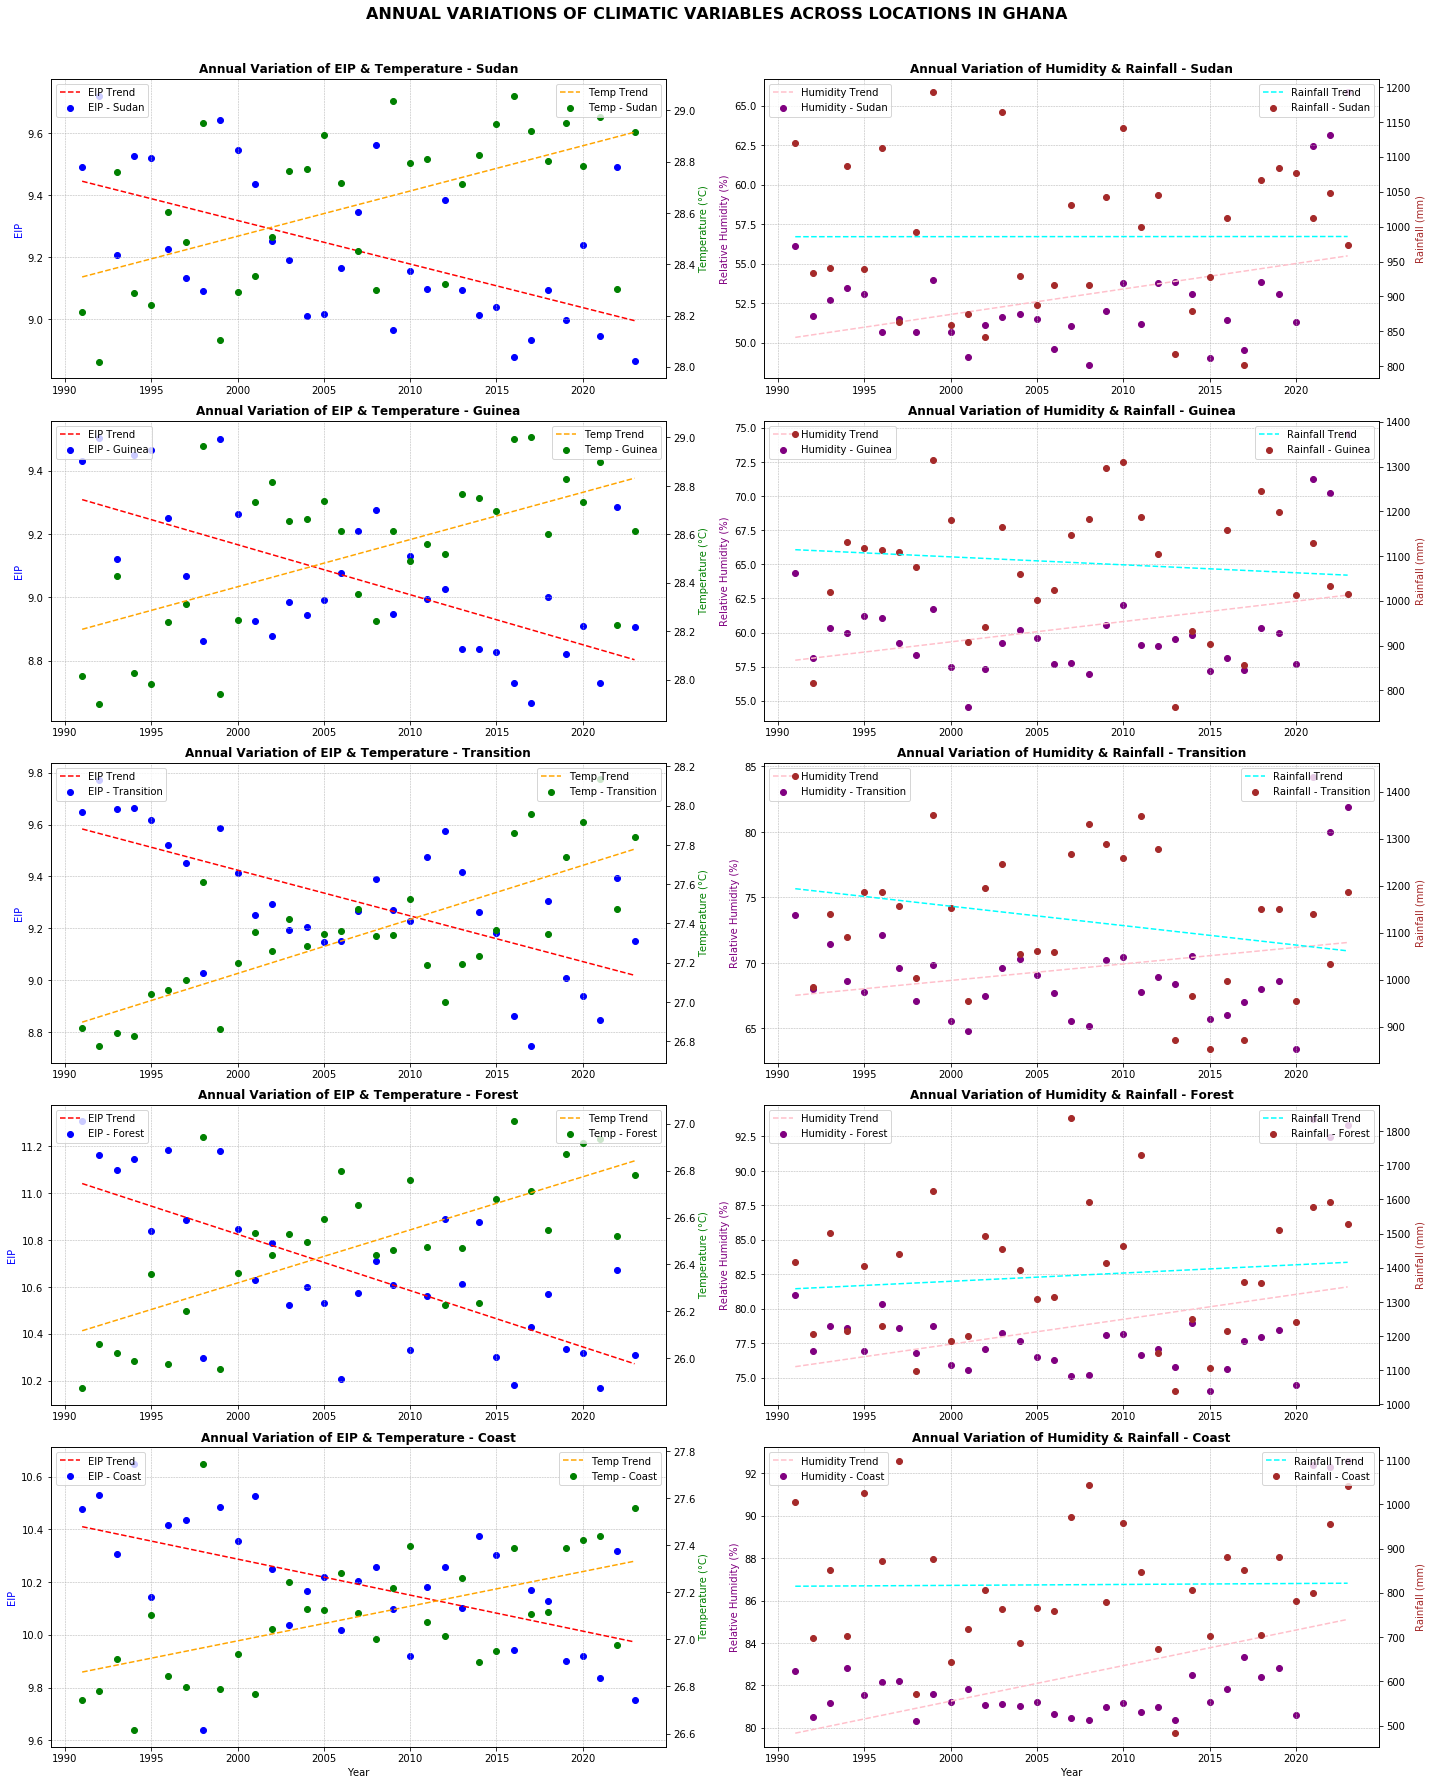

In [83]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets

EIP =  xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']
Temperature = xr.open_dataset('Ghana_ERA5_dTm_1991_2023.nc')
temp = Temperature['mm2t']
Humidity = xr.open_dataset('Ghana_RH_dd_1991-2023.nc')
humidity = Humidity['r']
Rainfall = xr.open_dataset('Ghana_chirps_dRR_1991_2023.nc')
rainfall = Rainfall['precip']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {loc: eip.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()}
location_temp_data = {loc: temp.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()}
location_humidity_data = {loc: humidity.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()}
location_rainfall_data = {loc: rainfall.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 2, figsize=(20, 25), sharex=False)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    # First column: EIP & Temperature
    ax1 = axes[i, 0]  # Select the subplot for the current location
    ax1_2 = ax1.twinx()  # Create a secondary y-axis
    
    # Compute annual means
    annual_data = data.resample(valid_time='Y').mean()
    annual_temp_data = location_temp_data[loc].resample(valid_time='Y').mean()
    
    years = annual_data['valid_time'].dt.year.values
    eip_values = annual_data.values
    temp_values = annual_temp_data.values
    
    # Scatter plot for EIP
    ax1.scatter(years, eip_values, label=f"EIP - {loc}", color='blue')
    
    # Fit a trend line for EIP
    if len(years) > 1:
        eip_coeffs = np.polyfit(years, eip_values, 1)  # Linear trend
        eip_trend = np.poly1d(eip_coeffs)
        ax1.plot(years, eip_trend(years), color='red', linestyle='--', label='EIP Trend')
    
    # Scatter plot for Temperature
    ax1_2.scatter(years, temp_values, label=f"Temp - {loc}", color='green')
    
    # Fit a trend line for Temperature
    if len(years) > 1:
        temp_coeffs = np.polyfit(years, temp_values, 1)  # Linear trend
        temp_trend = np.poly1d(temp_coeffs)
        ax1_2.plot(years, temp_trend(years), color='orange', linestyle='--', label='Temp Trend')
    
    # Customize subplot
    ax1.set_title(f"Annual Variation of EIP & Temperature - {loc}", fontsize=12, fontweight='bold')
    ax1.set_ylabel("EIP", fontsize=10, color='blue')
    ax1_2.set_ylabel("Temperature (°C)", fontsize=10, color='green')
    ax1.grid(True, linestyle='--', linewidth=0.5)
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')
    
    # Second column: Humidity & Rainfall
    ax2 = axes[i, 1]  # Select the subplot for the current location
    ax2_2 = ax2.twinx()  # Create a secondary y-axis
    
    # Compute annual means
    annual_humidity_data = location_humidity_data[loc].resample(time='Y').mean()
    annual_rainfall_data = location_rainfall_data[loc].resample(time='Y').sum()
    
    humidity_values = annual_humidity_data.values
    rainfall_values = annual_rainfall_data.values
    
    # Scatter plot for Humidity
    ax2.scatter(years, humidity_values, label=f"Humidity - {loc}", color='purple')
    
    # Fit a trend line for Humidity
    if len(years) > 1:
        humidity_coeffs = np.polyfit(years, humidity_values, 1)  # Linear trend
        humidity_trend = np.poly1d(humidity_coeffs)
        ax2.plot(years, humidity_trend(years), color='pink', linestyle='--', label='Humidity Trend')
    
    # Scatter plot for Rainfall
    ax2_2.scatter(years, rainfall_values, label=f"Rainfall - {loc}", color='brown')
    
    # Fit a trend line for Rainfall
    if len(years) > 1:
        rainfall_coeffs = np.polyfit(years, rainfall_values, 1)  # Linear trend
        rainfall_trend = np.poly1d(rainfall_coeffs)
        ax2_2.plot(years, rainfall_trend(years), color='cyan', linestyle='--', label='Rainfall Trend')
    
    # Customize subplot
    ax2.set_title(f"Annual Variation of Humidity & Rainfall - {loc}", fontsize=12, fontweight='bold')
    ax2.set_ylabel("Relative Humidity (%)", fontsize=10, color='purple')
    ax2_2.set_ylabel("Rainfall (mm)", fontsize=10, color='brown')
    ax2.grid(True, linestyle='--', linewidth=0.5)
    ax2.legend(loc='upper left')
    ax2_2.legend(loc='upper right')

# Set common x-label
axes[-1, 0].set_xlabel("Year", fontsize=10)
axes[-1, 1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF CLIMATIC VARIABLES ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_climate_variation.png', bbox_inches='tight', dpi=800)
plt.show()

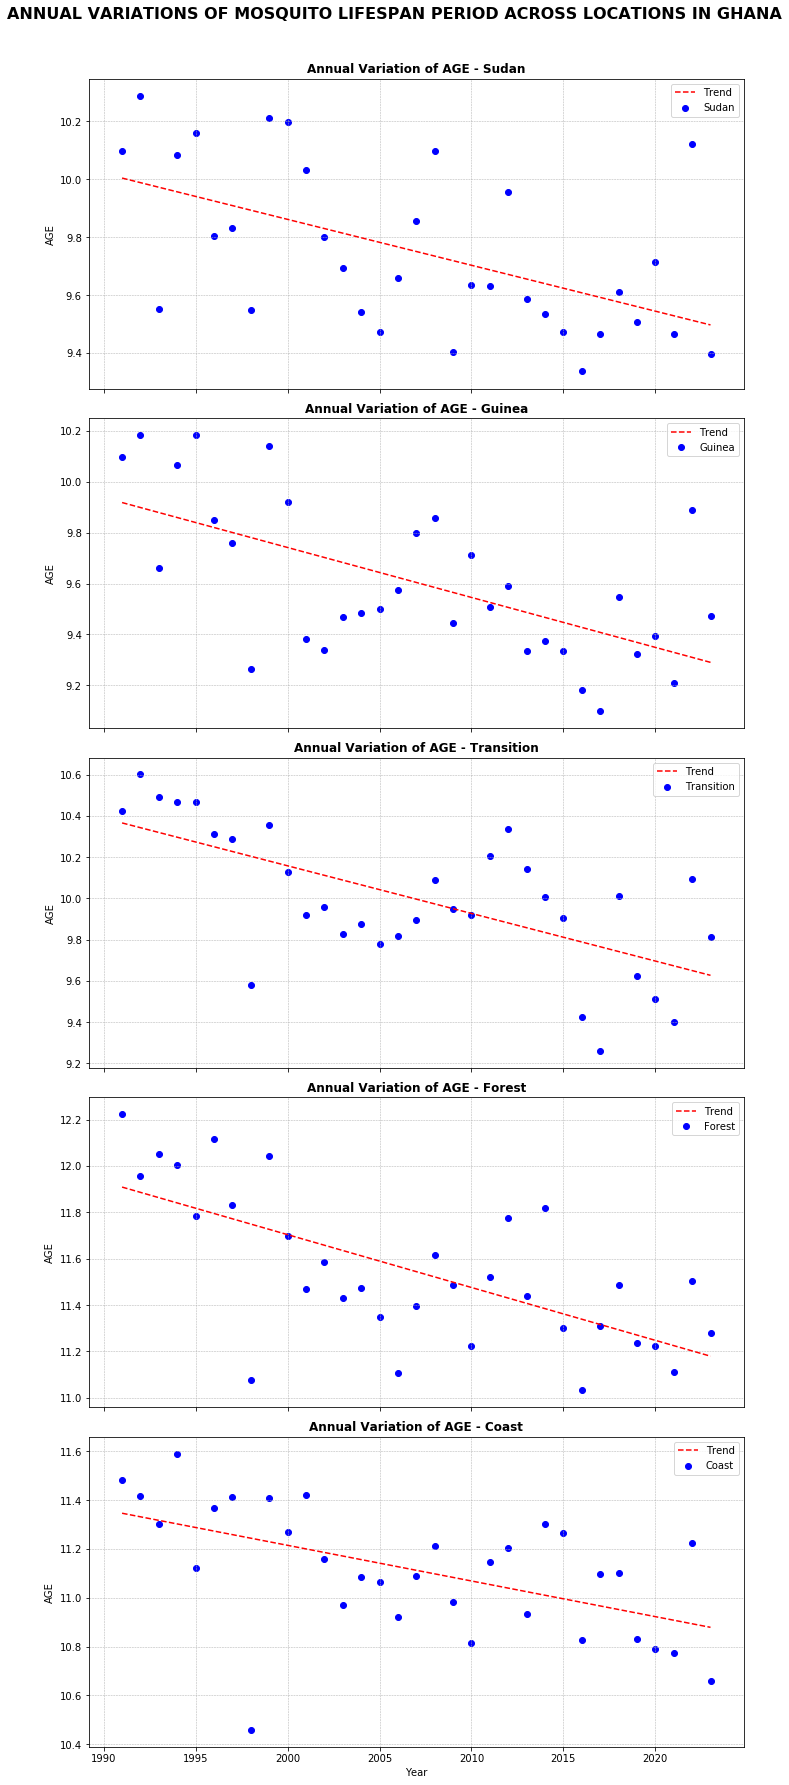

In [37]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
AGE = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')
age = AGE['age']

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location
location_data = {
    loc: age.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Initialize the subplot grid for annual trends
fig, axes = plt.subplots(5, 1, figsize=(10, 25), sharex=True)

# Loop through each location
for i, (loc, data) in enumerate(location_data.items()):
    ax = axes[i]  # Select the subplot for the current location
    
    # Compute annual means
    annual_data = data.resample(valid_time='Y').mean()
    years = annual_data['valid_time'].dt.year.values
    values = annual_data.values
    
    # Scatter plot of annual variation
    ax.scatter(years, values, label=loc, color='blue')
    
    # Fit a trend line
    if len(years) > 1:
        coeffs = np.polyfit(years, values, 1)  # Linear trend
        trend = np.poly1d(coeffs)
        ax.plot(years, trend(years), color='red', linestyle='--', label='Trend')
    
    # Customize subplot
    ax.set_title(f"Annual Variation of AGE - {loc}", fontsize=12, fontweight='bold')
    ax.set_ylabel("AGE", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()

# Set common x-label
axes[-1].set_xlabel("Year", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("ANNUAL VARIATIONS OF MOSQUITO LIFESPAN PERIOD ACROSS LOCATIONS IN GHANA", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.95)

# Save and show the plot
# plt.savefig('ghana_annual_eip_variation.png', bbox_inches='tight', dpi=800)
plt.show()


In [10]:
AGE = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')
age = AGE['age']


<xarray.DataArray 'age' (valid_time: 396, latitude: 30, longitude: 20)>
[237600 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 1991-01-16T11:30:00 ... 2023-12-1...
  * longitude   (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude    (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    cell_methods:  valid_time: mean

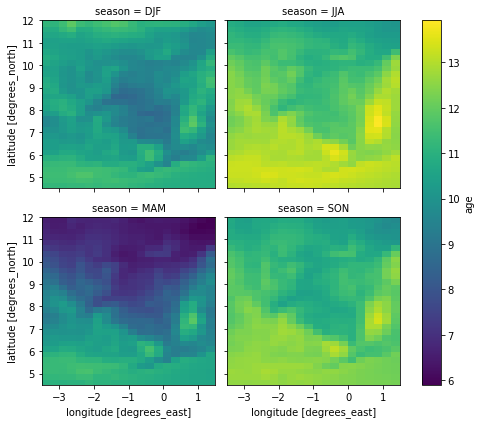

In [16]:
seasonal_grouping= age.groupby('valid_time.season').mean('valid_time')
seasonal_grouping.plot(col_wrap=2, col='season')

KeyError: 'valid_time'

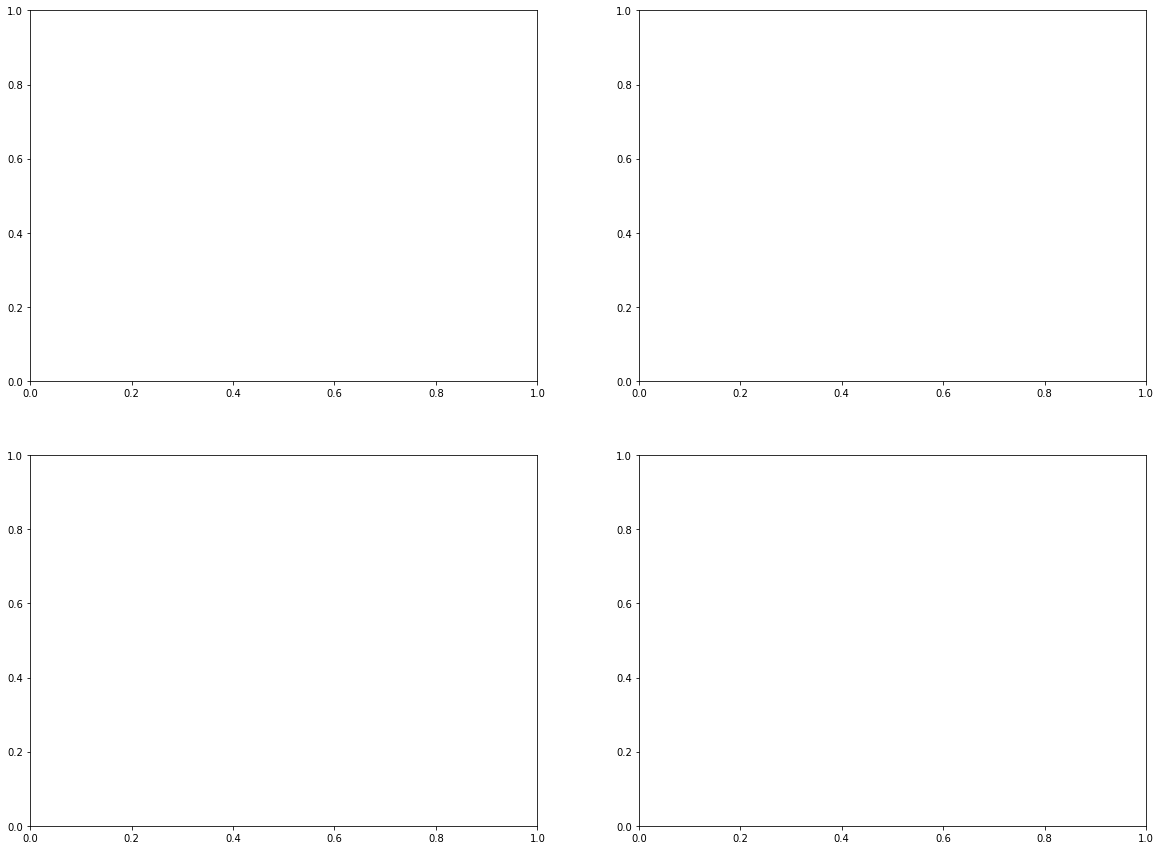

In [20]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
AGE = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')
age = seasonal_grouping
# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location using the nearest grid point
location_data = {
    loc: age.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Get month names for subplot titles
#month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
season_names = ['DJF','MAM','JJA','SON']

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month (1 to 12)
for season in range(1, 5):
    ax = axes[season - 3]  # Select the subplot for the current month

    for loc, data in location_data.items():
        # Select data for the given month across all years
        season_data = data.where(data['valid_time'].dt.season == season, drop=True)

        # Plot vectorial capacity against time
#        ax.plot(monthly_data['valid_time'], monthly_data, label=loc,  linestyle='-')

    # Customize subplot
#    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
#    ax.set_xlabel("Year", fontsize=10)
#    ax.set_ylabel("AGE", fontsize=10)
#    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
#axes[0].legend(loc='upper left')
#axes[4].legend(loc='upper right')
#axes[8].legend(loc='upper left')
#axes[11].legend(loc='upper right')

# Adjust layout
#plt.tight_layout()
#plt.suptitle("YEARLY VARIATIONS OF MOSQUITO LIFESPAN FOR EACH MONTH ACROSS LOCATIONS", 
#             fontsize=16, fontweight='bold', y=0.99)
#plt.subplots_adjust(top=0.9)

# Save and show the plot
#plt.savefig('vectorial_capacity_variation.png', bbox_inches='tight', dpi=800)
#plt.show()


In [ ]:
locations = ['Navrongo', 'Yendi', 'Wenchi', 'Kumasi', 'Tema']
location_mapping = {
    'Navrongo': 'Sudan Savannah',
    'Yendi': 'Guinea Savannah',
    'Wenchi': 'Transition',
    'Kumasi': 'Forest',
    'Tema': 'Coast'
}

temperature_types = ['Tx']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))
axes[2, 1].set_visible(False)

if len(temperature_types) == 1:
    axes = axes.reshape(-1, 1)
   
for i, location in enumerate(locations):
    for j, temp_type in enumerate(temperature_types):
        file_path = f'{location}_1961-2020_mm{temp_type}_anomaly.txt'
        column_names = ['Year', 'Month', 'Temp', 'anomaly']
        data = pd.read_csv(file_path, sep='\s+', header=None, names=column_names)
        heatmap_data = data.pivot(index='Month', columns='Year', values='anomaly')
        sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=False, ax=axes[i, j])
       
        months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
        axes[i, j].set_yticklabels(months, rotation=45)  
        axes[i, j].set_title(f'{location_mapping[location]}')

cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])  
cbar = plt.colorbar(axes[0, 0].collections[0], cax=cbar_ax, orientation='horizontal')
cbar.set_label('SAI', labelpad=10)

plt.suptitle("Standard Anomaly for Maximum Temperature '1961-2020'", fontsize=20)
plt.tight_layout()
output_filename = 'SAI_Maximum_Temp_plot.png'  
plt.savefig(output_filename)
plt.show()